
Google Drive ile bağlantı kurulur

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# LOAD LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

"Dosya Seç" e tıklanarak bilgisayardaki data yüklenir
(Veri setini yüklemek için farklı seçenekler de var)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Orijinal veri seti ";" ile ayırarak düzenli hale getirmesi gerekir.

In [3]:
df = pd.read_csv("winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA (Exploratory Data Analysis)

Exploratory Data Analysis, özet istatistikler ve grafik gösterimler yardımıyla kalıpları keşfetmek, anormallikleri tespit etmek, hipotezi test etmek ve varsayımları kontrol etmek için veriler üzerinde ilk araştırmaları gerçekleştirmenin kritik sürecini ifade eder.

Veri setini anlamlandırmamızı sağlar.

In [4]:
#ilk 5 satırı gösterir
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Son 5 satırı satırı
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
#Rastgele 5 satırı gösterir
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
298,7.2,0.650,0.02,2.30,0.094,5.0,31.0,0.99930,3.67,0.80,9.7,5
1181,9.8,0.390,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4,5
1104,8.0,0.480,0.34,2.20,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,6
1178,5.6,0.915,0.00,2.10,0.041,17.0,78.0,0.99346,3.68,0.73,11.4,5
568,9.8,0.500,0.49,2.60,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,6


In [7]:
#Veri seti hakkında bilgi verir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Hangi sütunda kaç tane boş veri var onu gösterir
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Bir şarabın kalitesi şeker oranı, sitrik asit oranı gibi diğer değişkenlere bağlı olarak değişecepi için bu veri setinde bağımlı değişkenimiz "quality"dir.

In [9]:
# İstatistik verilerini gösterir 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#Bir sütunun diğer bir sütuna olan bağlılığını gösterir
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

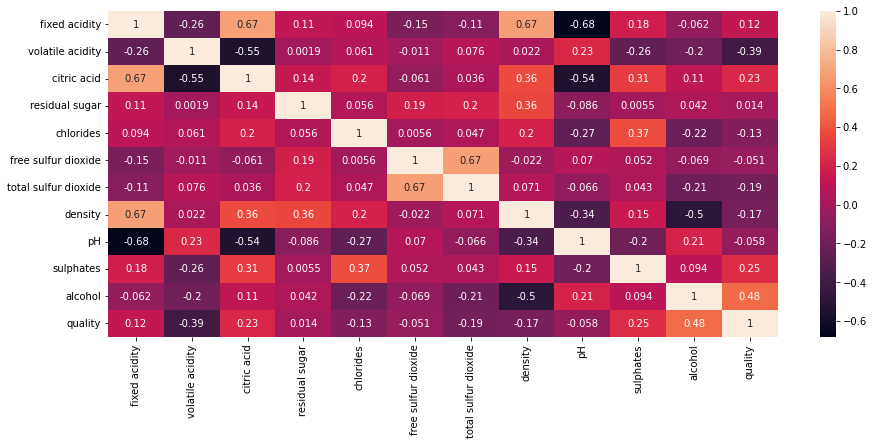

In [11]:
#Korelasyonu ısı haritası kullanarak görselleştirdik
#"annot=True" kullanarak hücrelerdeki değerleri yazdırmış olduk
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

Korelasyon "0"a yaklaştıkça değişkenlerin arasında doğrusal bir ilişki olamadığınız anlarız. Bu tabloya bakarak "quality"nin "residual sugar" ve "free sulfur dioxide" ile nerdeyse bir ilişkisinin olmadığını anlayabiliriz.

In [12]:
# ‘unique()’ verilen verinin kaç adet ‘eşşiz’ verisi olduğunu bize verir
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

Veri setinde şarabın kalitesine verilen puanları görmüş olduk

In [13]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Puanların verisetindeki dağılımını görüyoruz

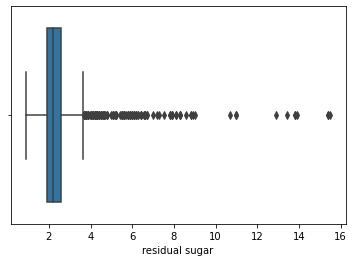

In [14]:
sns.boxplot(x=df["residual sugar"]);

Boxplot = Verideki dağılımını, çarpık ve basıklık yönünden verileri özetlemek, ve herhangi bir aykırı değer olup olmadığını anlamak için kullanılır.

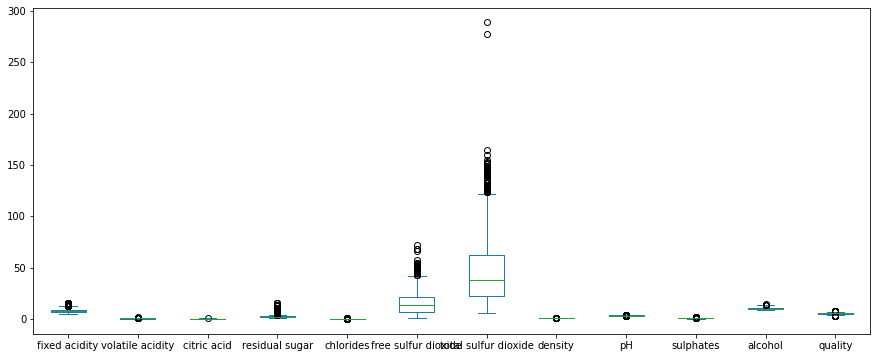

In [15]:
df.plot(kind='box',figsize=(15,6));

Grafiği anlamdırmak zor olduğu için farklı bir yöntem deniyoruz.

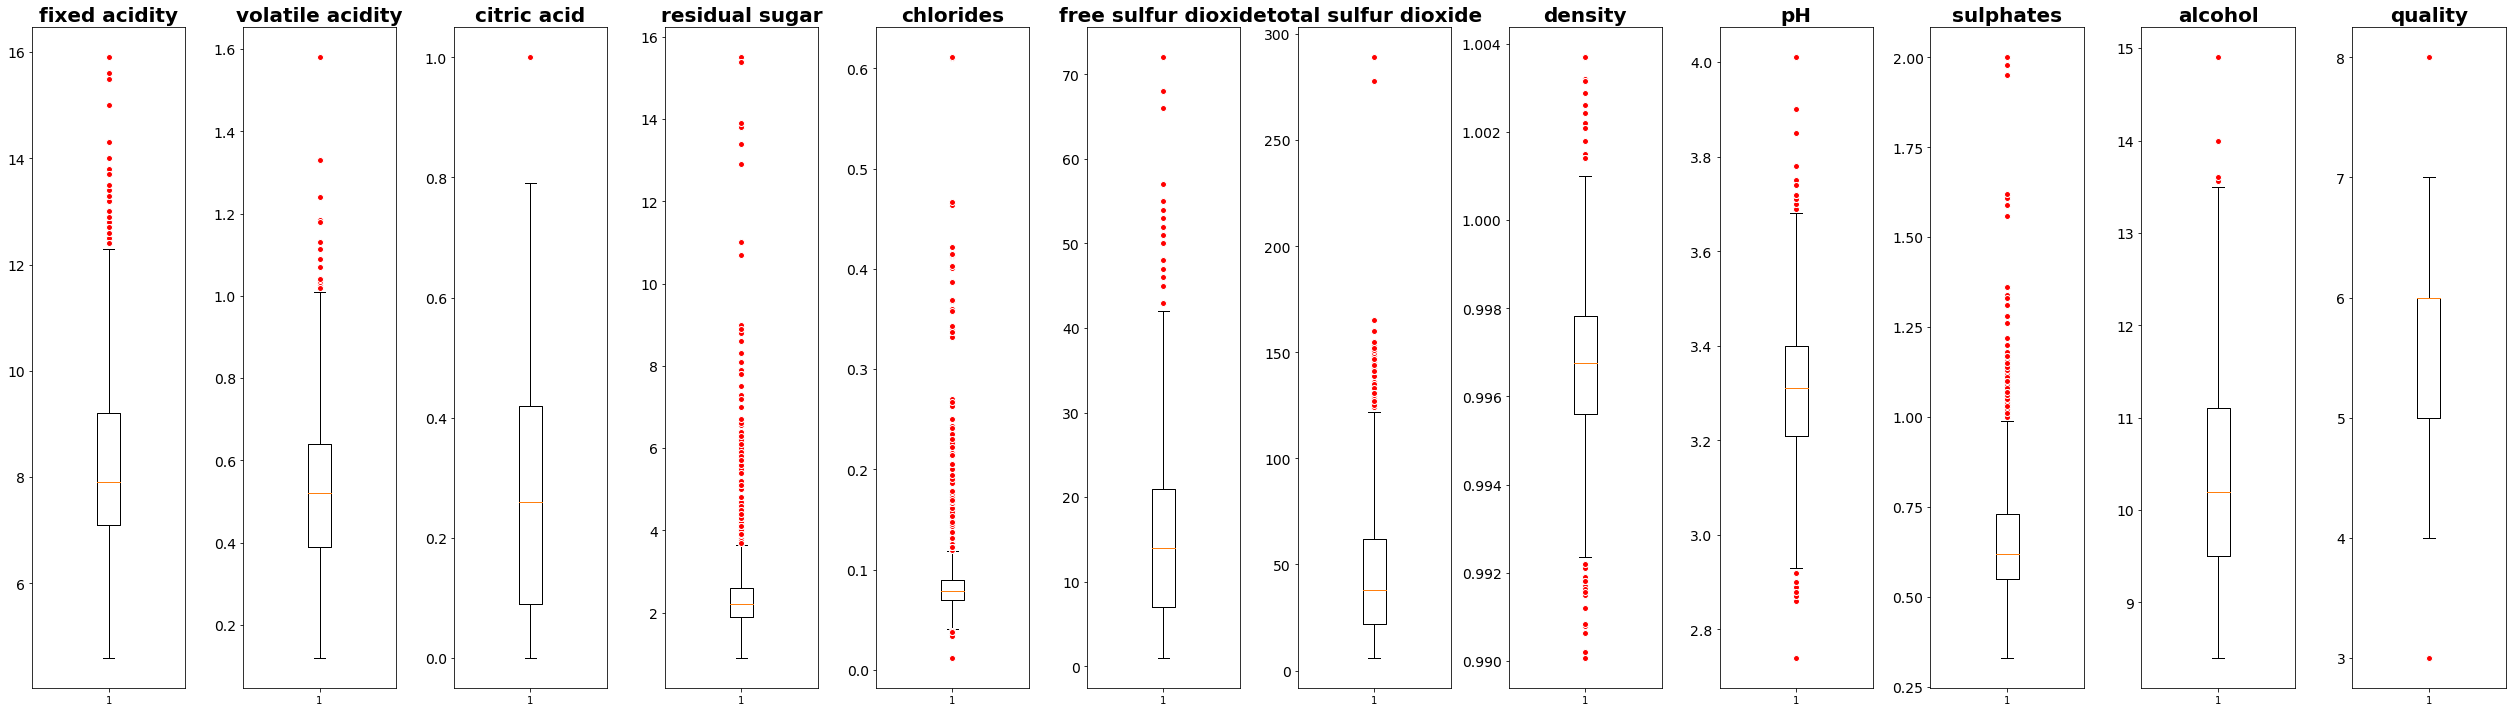

In [16]:
#Aykırı değerin kırmızı bir alt çizgi dairesi olarak tanımlamak için
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
"""
fig, eksenleri plt.subplots olarak tanımlanır. 
Sütun sayısı df.columns uzunluğuna eşit olacaktır. 
"""
fig, axs = plt.subplots(1, len(df.columns), figsize=(35,10))

for i, ax in enumerate(axs.flat):

    #Burada i indeks değişkenine göre sütunları alıyoruz ve aykırı özelliklerimizi belirtiriz ve red_circle'ı ekliyoruz.
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    #Sütun adlarının sütunlara eşit olup olmadığını kontrol ediliyor
    if df.columns[i] == 'RDEP' or df.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()

In [17]:
sns.pairplot(df,hue="quality")

Output hidden; open in https://colab.research.google.com to view.

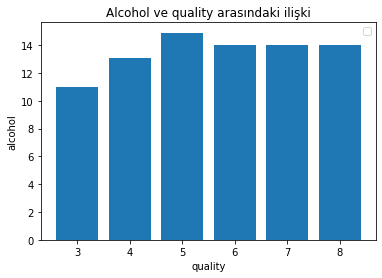

In [26]:
#Alcohol ve quality arasındaki ilişkiyi incelemek için 
plt.bar(df['quality'], df['alcohol'])
plt.title('Alcohol ve quality arasındaki ilişki')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

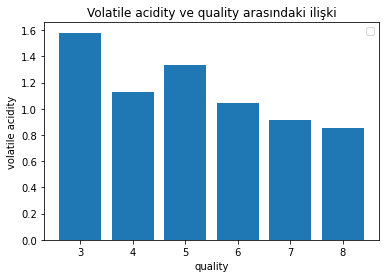

In [27]:
plt.bar(df['quality'], df['volatile acidity'])
plt.title('Volatile acidity ve quality arasındaki ilişki')
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.legend()
plt.show()

## Feature Engineering

Özellik mühendisliği, ham verileri seçme, değiştirme ve denetimli öğrenmede kullanılabilecek özelliklere dönüştürme işlemidir. Eğitim setinde olmayan yeni değişkenler oluşturmak için verilerden yararlanan bir makine öğrenimi tekniğidir. Veri dönüşümlerini basitleştirmek ve hızlandırmak ve aynı zamanda model doğruluğunu artırmak amacıyla hem denetimli hem de denetimsiz öğrenme için yeni özellikler üretebilir

Önce veri setini normalleştiriyorum. Verilerin normalleştirilmesi, dağılımının tek tip bir aralığa sahip olması için verileri dönüştürecektir. Buradaki verilerin aralıklarını eşitlemek önemlidir, çünkü veri kümemizde örneğin sitrik asit ve uçucu asitlik değerlerinin tümü 0 ile 1 arasındadır. Buna karşılık, toplam kükürt dioksitin bazı değerleri 100'ün üzerinde ve bazı değerleri 10'un altındadır. Aralıklardaki bu eşitsizlik, bir özellikteki küçük bir değişiklik diğerini etkilemeyebileceğinden sorun yaratabilir. Bu sorunu çözmek için, veri kümesinin aralıklarını 0 ile 1 arasında tek tip bir aralığa normalleştiriyorum.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns = df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

Ardından, sınıflandırma sonuçlarını biraz daha doğrudan hale getirmek için, orijinal df veri kümesinde "iyi şarap" adlı yeni bir sütun oluşturdum. "İyi şarap", kalite 7'ye eşit veya üzerinde olduğunda "evet"e eşittir. "İyi şarap", kalite 7'den düşük olduğunda "hayır"a eşittir.

In [37]:
df["excellent quality"] = ["yes" if i >= 6 else "no" for i in df['quality']]

In [38]:
df["excellent quality"].head()

0     no
1     no
2     no
3    yes
4     no
Name: excellent quality, dtype: object

In [40]:
#one hot-encoding
df["excellent quality"] = pd.get_dummies(df["excellent quality"],drop_first=True)
df["excellent quality"][:5]

0    0
1    0
2    0
3    1
4    0
Name: excellent quality, dtype: uint8

In [41]:
df["excellent quality"].value_counts()

1    855
0    744
Name: excellent quality, dtype: int64